In [1]:
import numpy as np
from methods import grad_desc, coord_desc, proj_desc, proj_ball_desc
from plotting import plot_it
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(104)
n = 5
m = 2
A = np.random.rand(n, m)
b = 4 * np.random.rand(m)
Q = A.T.dot(A)
f = lambda x: (0.5 * Q.dot(x) + b).dot(x)
grad = lambda x: Q.dot(x) + b
x_star = -np.linalg.inv(Q).dot(b)

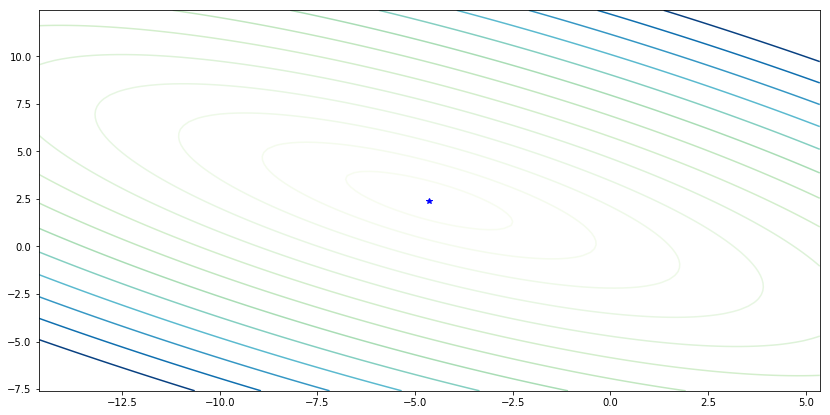

In [3]:
plot_it(f, x_star);

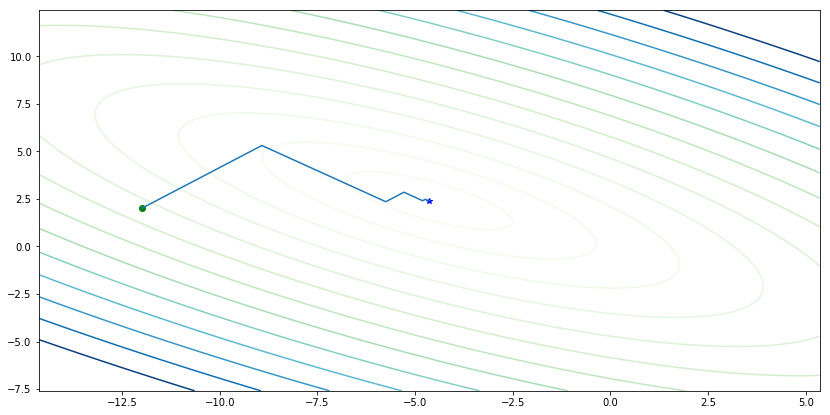

In [4]:
x_0 = [-12, 2]
xs, fs = grad_desc(x_0, f, grad, Q)
p = plot_it(f, x_star, x_0, xs);

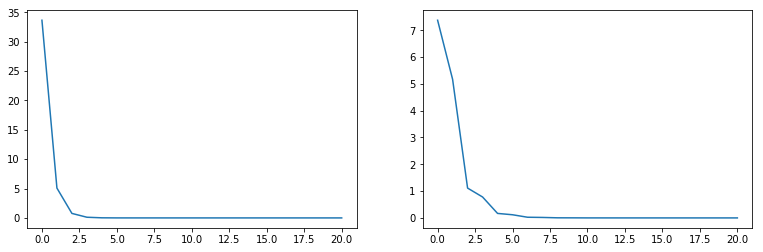

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,4))
ax1.plot(np.abs(f(x_star) - fs))
ax2.plot(np.linalg.norm(x_star - xs, axis=1))

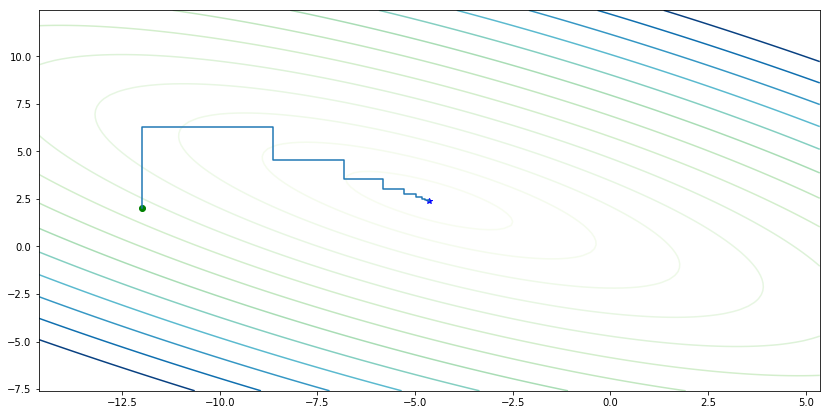

In [6]:
xs, fs = coord_desc(x_0, f, grad, Q,  iters=100)
p = plot_it(f, x_star, x_0, xs);

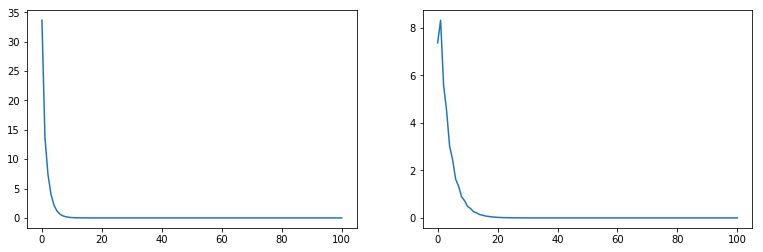

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,4))
ax1.plot(np.abs(f(x_star) - fs))
ax2.plot(np.linalg.norm(x_star - xs, axis=1))

In [8]:
y_min, y_max = p.gca().get_ylim()
x_min, x_max = p.gca().get_xlim()
line = [[x_min, x_max],
        [y_min + abs(y_max - y_min) * 0.2, y_min + abs(y_max - y_min) * 0.33]]

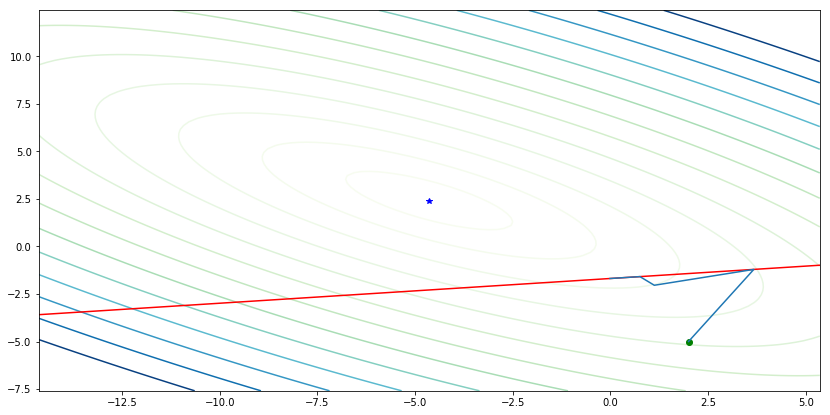

In [10]:
x_0 = [2, -5]
xs, fs = proj_desc(x_0, f, grad,line,  iters=120)
p = plot_it(f, x_star, x_0, xs, bound_line=line)

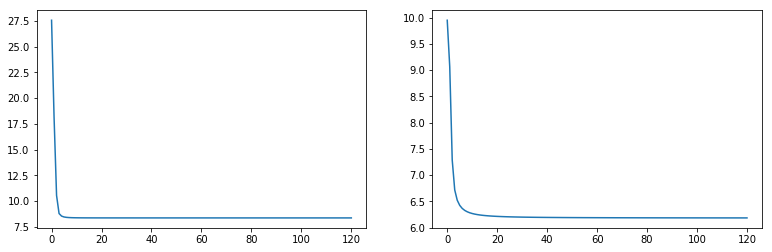

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,4))
ax1.plot(np.abs(f(x_star) - fs))
ax2.plot(np.linalg.norm(x_star - xs, axis=1))

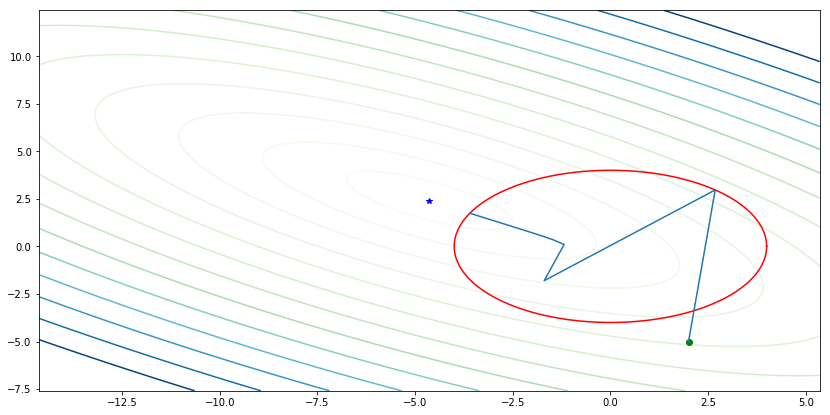

In [16]:
a = np.linspace(0, 2*np.pi, 100)
r = 4
center = [0,0]
x1 = r * np.cos(a) + center[0]
x2 = r * np.sin(a) + center[1]
x_0 = [2, -5]
xs, ys = proj_ball_desc(x_0, f, grad, center, r)
p = plot_it(f, x_star, x_0=x_0, bound_line=[x1, x2], search_line=xs);

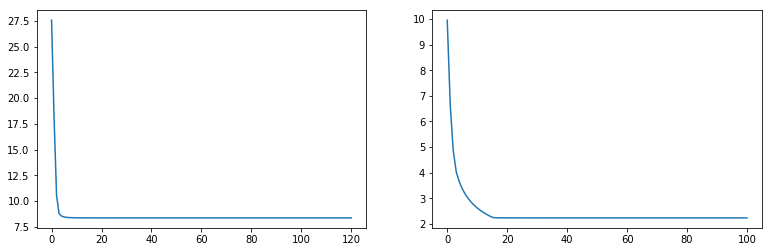

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,4))
ax1.plot(np.abs(f(x_star) - fs))
ax2.plot(np.linalg.norm(x_star - xs, axis=1))